**INF 352: Lab 5
Elisabeth Vehling**

In [11]:
import pandas as pd
import sklearn as sk
from sklearn import metrics
from sklearn import tree
import skmultilearn as skm
from skmultilearn import problem_transform


**1. Decision Trees as Interpretable Models**

**1(a) Download acute inflamations data**

In [12]:
 #Attribute Information:

#a1 Temperature of patient { 35C-42C }
#a2 Occurrence of nausea { yes, no }
#a3 Lumbar pain { yes, no }
#a4 Urine pushing (continuous need for urination) { yes, no }
#a5 Micturition pains { yes, no }
#a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
#d1 decision: Inflammation of urinary bladder { yes, no }
#d2 decision: Nephritis of renal pelvis origin { yes, no }
column_names = ['a1','a2','a3','a4','a5','a6','d1','d2']
data = pd.read_csv('lab5/data/diagnosis.csv', encoding='utf-16', sep='\t', index_col=False, names=column_names, decimal=',')

#Convert all of the yes to 1 and no to 0
data['a2'].replace('no', 0, inplace=True)
data['a3'].replace('no', 0, inplace=True)
data['a4'].replace('no', 0, inplace=True)
data['a5'].replace('no', 0, inplace=True)
data['a6'].replace('no', 0, inplace=True)
data['d1'].replace('no', 0, inplace=True)
data['d2'].replace('no', 0, inplace=True)


data['a2'].replace('yes', 1, inplace=True)
data['a3'].replace('yes', 1, inplace=True)
data['a4'].replace('yes', 1, inplace=True)
data['a5'].replace('yes', 1, inplace=True)
data['a6'].replace('yes', 1, inplace=True)
data['d1'].replace('yes', 1, inplace=True)
data['d2'].replace('yes', 1, inplace=True)


Y = data.iloc[:, 6:]
X = data.iloc[:, 0:6]

**1(b) Build a decision tree on the data and plot it**

[Text(133.92000000000002, 195.696, 'X[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]'),
 Text(66.96000000000001, 152.208, 'X[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(234.36, 108.72, 'X[1] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(301.32000000000005, 21.744, 'gini = 0.0\nsamples = 19\nvalue = [0, 0,

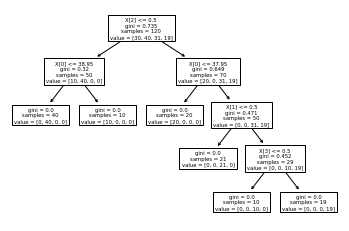

In [38]:
#Convert to multiclass dataset
import numpy as np
dt = tree.DecisionTreeClassifier()
lp = skm.problem_transform.LabelPowerset(classifier=dt, require_dense = [True, True])
lp.fit(X,Y)
t = tree.plot_tree(dt)
t
# inp = np.matrix('0 1')
# lp.transform(inp)

**1(c) Convert the decision tree to a series of if-then rules**

In [545]:
#Function code in this cell is from the link provided in assignment instructions
def tree_to_pseudo(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    
    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print("\nif ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print("\n} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print("\n}")
        else:
            print("\nreturn " + str(value[node]))
    recurse(left, right, threshold, features, 0)

In [546]:
tree_to_pseudo(dt, column_names)


if ( a3 <= 0.5 ) {

if ( a4 <= 0.5 ) {

return [[10.  0.  0.  0.]]

} else {

return [[ 0. 40.  0.  0.]]

}

} else {

if ( a1 <= 37.95000076293945 ) {

return [[20.  0.  0.  0.]]

} else {

if ( a2 <= 0.5 ) {

return [[ 0.  0. 21.  0.]]

} else {

if ( a4 <= 0.5 ) {

return [[ 0.  0. 10.  0.]]

} else {

return [[ 0.  0.  0. 19.]]

}

}

}

}


**2. Random Forests, Ridge Regularized, and LASSO Regularized Regression**

**2(a) Download the communities and crime data**

In [15]:
#Names of attributes
colnames = pd.read_csv('lab5/data/communitycols.csv', index_col=False, names = ['null', 'attribute', 'type'], sep=" ")

In [16]:
column_names2 = []
for i in colnames['attribute']:
    column_names2.append(i)
communities = pd.read_csv('lab5/data/communities.data', index_col = False, names= column_names2)

**2(b) The data set has missing values. Use a simple data imputation technique (using the mean or median statistic of each feature) to deal with the missing values in the data set. The data description mentions that five features are nonpredictive. Ignore those features.**

In [17]:
stats = pd.read_csv("lab5/data/communitystats.csv", sep=" ", index_col = False, names=['attr', 'min', 'max', 'mean', 'sd', 'correl', 'median','mode', 'missing'])
stats = stats.drop(stats.index[0])

In [18]:
#Get mean for each attribute and add to means 
means = []
for j in range(0,5):
    means.append(0)
for i in stats['mean']:
    means.append(i)

#Substitute the mean for missing data in the column 
for i in range(4,128):
    communities.iloc[:,i].replace(to_replace='?', value= means[i], inplace=True)    

In [19]:
communities.iloc[:,5:] = communities.iloc[:,5:].astype(float)

In [20]:
#Split into train and test data
train = communities.iloc[0:1495, :]
test = communities.iloc[1495:,:]

**2(c) Plot a correlation matrix for the features in the data set.**

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

#Calculate correlation matrix and plot
corr = communities.iloc[:,5:].corr()
corr.style.background_gradient(cmap='coolwarm')

**2(d) Calculate the Coefficient of Variation CV for each feature, where CV = s , in
  which s is sample standard deviation and m is sample mean**

In [12]:
#use the stats df from above
att = []
m = []
sd = []
cv = []
for i in range(1,124):
    att.append(stats["attr"].loc[i])
    m.append(float(stats["sd"].loc[i]))
    sd.append(float(stats["mean"].loc[i]))
for i in range(0,123):
    cv.append(sd[i]/m[i])

coeffVar = pd.DataFrame(list(zip(att, cv)), columns=['attribute', 'coeff. of variation'])
coeffVar

attribute  coeff. of variation
0             population             0.461538
1          householdsize             2.875000
2           racepctblack             0.720000
3           racePctWhite             3.125000
4           racePctAsian             0.714286
..                   ...                  ...
118  LemasPctPolicOnPatr             3.333333
119  LemasGangUnitDeploy             1.073171
120  LemasPctOfficDrugUn             0.375000
121      PolicBudgPerPop             1.250000
122  ViolentCrimesPerPop             1.043478

[123 rows x 2 columns]

**2(e) Pick 11 features with the highest CV and make scatter plots and box plots for them. Can you make conclusions about the significance of those features from the plots?**

In [13]:
#Get top 11 features with highest CV
coeffVar = coeffVar.sort_values(by='coeff. of variation', ascending=False)
highestCV = coeffVar.iloc[0:11, :]
highestCV

attribute  coeff. of variation
98     LemasSwFTFieldOps             7.076923
72          PctHousOccup             3.789474
7            agePct12t29             3.500000
60      PctSpeakEnglOnly             3.434783
118  LemasPctPolicOnPatr             3.333333
105        PctPolicWhite             3.318182
42            PersPerFam             3.266667
95        PctSameState85             3.250000
94         PctSameCity85             3.150000
3           racePctWhite             3.125000
13              pctWWage             3.111111

I dont think we can draw conclusions about the significance of the values just from the figures. While we can see that there are some denser clusters representing possible correlcation between the predictor and response variables, its too diffcult draw any conclusions about the significance of the varialbes just from the diagrams.

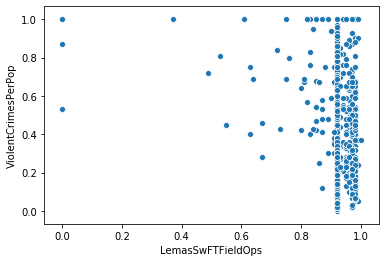

In [16]:
import seaborn as sns
#Find each of the attributes in the highestCV in the communities df and plot against violent crimes
y_plot = communities["ViolentCrimesPerPop"]
sns.scatterplot(x="LemasSwFTFieldOps", y="ViolentCrimesPerPop", data=communities)

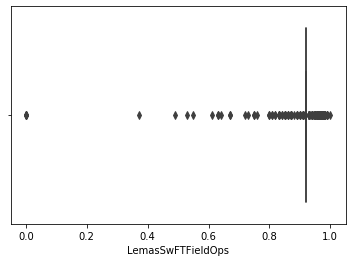

In [34]:
# communities["LemasSwFTFieldOps"].boxplot()
sns.boxplot(communities["LemasSwFTFieldOps"])

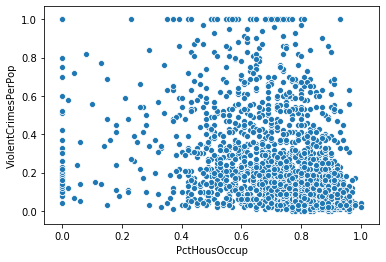

In [586]:
sns.scatterplot(x="PctHousOccup", y="ViolentCrimesPerPop", data=communities)

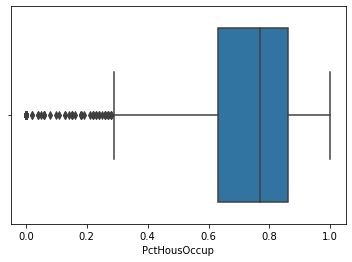

In [35]:
sns.boxplot(communities["PctHousOccup"])

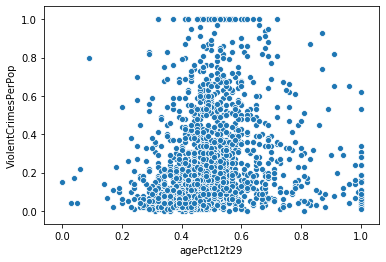

In [397]:
sns.scatterplot(x="agePct12t29", y="ViolentCrimesPerPop", data=communities)


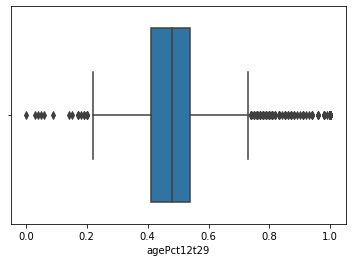

In [36]:
sns.boxplot(communities["agePct12t29"])

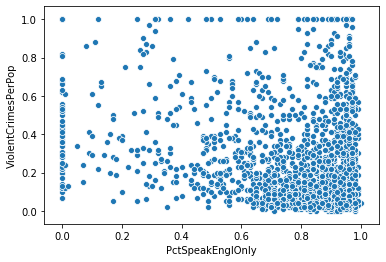

In [399]:
sns.scatterplot(x="PctSpeakEnglOnly", y="ViolentCrimesPerPop", data=communities)


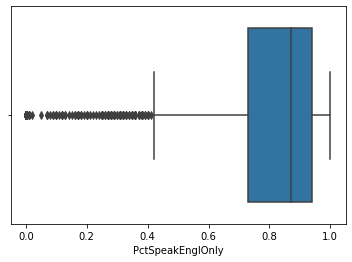

In [37]:
sns.boxplot(communities["PctSpeakEnglOnly"])

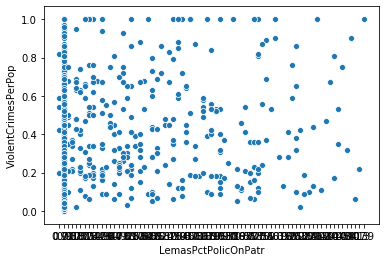

In [401]:
sns.scatterplot(x="LemasPctPolicOnPatr", y="ViolentCrimesPerPop", data=communities)


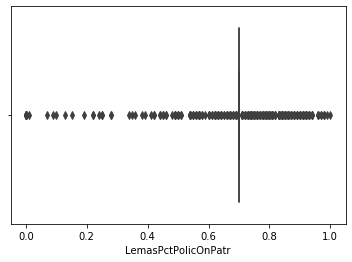

In [38]:
sns.boxplot(communities["LemasPctPolicOnPatr"])

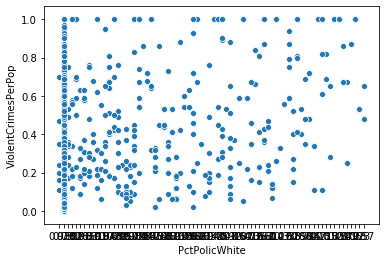

In [403]:
sns.scatterplot(x="PctPolicWhite", y="ViolentCrimesPerPop", data=communities)


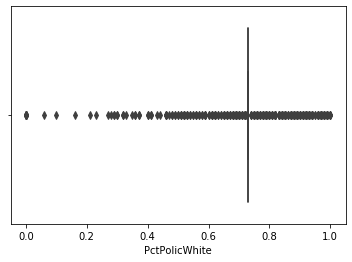

In [39]:
sns.boxplot(communities["PctPolicWhite"])

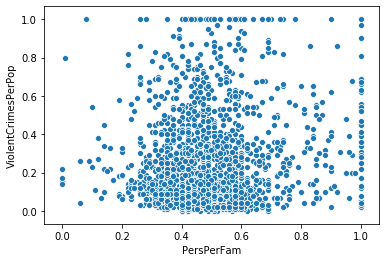

In [405]:
sns.scatterplot(x="PersPerFam", y="ViolentCrimesPerPop", data=communities)


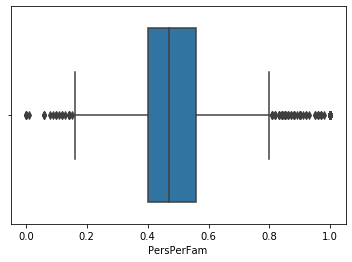

In [40]:
sns.boxplot(communities["PersPerFam"])

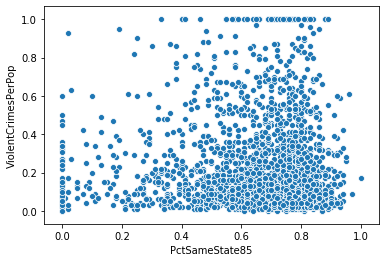

In [407]:
sns.scatterplot(x="PctSameState85", y="ViolentCrimesPerPop", data=communities)


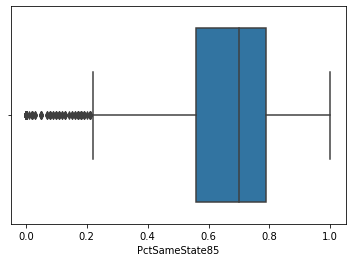

In [41]:
sns.boxplot(communities["PctSameState85"])

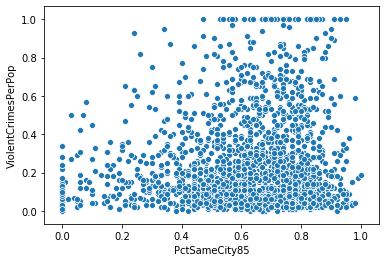

In [409]:
sns.scatterplot(x="PctSameCity85", y="ViolentCrimesPerPop", data=communities)


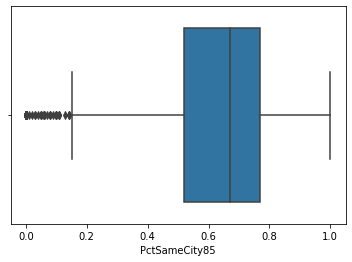

In [42]:
sns.boxplot(communities["PctSameCity85"])

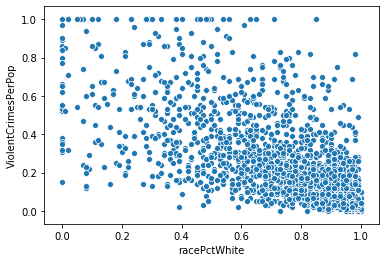

In [411]:
sns.scatterplot(x="racePctWhite", y="ViolentCrimesPerPop", data=communities)


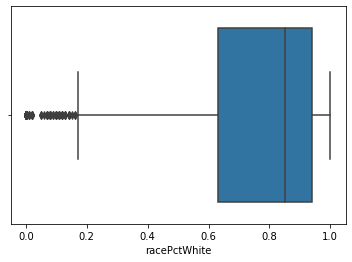

In [43]:
sns.boxplot(communities["racePctWhite"])

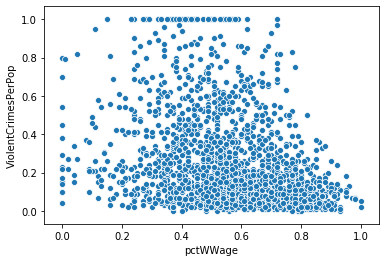

In [413]:
sns.scatterplot(x="pctWWage", y="ViolentCrimesPerPop", data=communities)

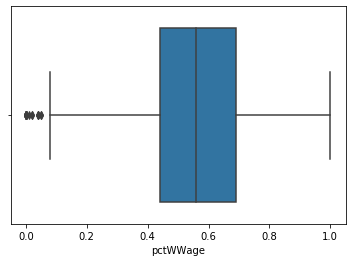

In [44]:
sns.boxplot(communities["pctWWage"])

**2(f) Fit a linear model using least squares to the training set and report the test error**

In [21]:
from sklearn.linear_model import LinearRegression
train_X = train.iloc[:,5:127]
train_y = train["ViolentCrimesPerPop"]

test_X = test.iloc[:,5:127]
test_y = test["ViolentCrimesPerPop"]

r = LinearRegression().fit(train_X, train_y)
predictions= r.predict(test_X)
test_err = r.score(test_X, test_y)
print("Linear Model Test error:", 1-test_err)

Linear Model Test error: 2.4343699681807876e+19


**2(g) Fit a ridge regression model on the training set, with λ chosen by 5-fold cross- validation. Report the test error obtained.**

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [23]:
#Alphas to test:
a = [0.0001, 0.001, 0.01, 1, 100, 1000, 10000, 100000, 1000000]
cv = RidgeCV(cv=5, alphas=a).fit(train_X, train_y)
test_error = cv.score(test_X, test_y)
print("Alpha chosen:", cv.alpha_)
print("Ridge Regression test error:", 1-test_error)

Alpha chosen: 1.0
Ridge Regression test error: 0.3728374155978238


**2(h) Fit a LASSO model on the training set, with λ chosen by 5-fold cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.**

In [24]:
predictors = communities.columns[5:127]

In [25]:
from sklearn.linear_model import LassoCV
cv2 = LassoCV(cv=5, alphas=a).fit(train_X, train_y)
test_error2 = cv2.score(test_X, test_y)
print("Alpha chosen:", cv2.alpha_)
print("Lasso Regression (non-standardized) test error: ", (1-test_error2))
#for each value that isnt zero in the cv2.coef_ array report that predictor
print("\nVariables selected by model:",)
for i in range(len(cv2.coef_)):
    if cv2.coef_[i] != 0 :
        #print the feature
        print(predictors[i])

Alpha chosen: 0.0001
Lasso Regression (non-standardized) test error:  0.3739814835275125

Variables selected by model:
racepctblack
racePctAsian
agePct12t21
agePct12t29
agePct65up
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctBSorMore
PctEmploy
PctEmplManu
PctOccupManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec10
PctRecImmig10
PctNotSpeakEnglWell
PctLargHouseOccup
PersPerOccupHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
MedNumBR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
OwnOccLowQuart
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
PolicReqPerOffic
RacialMatchCommPol
PctPolicBlack
PctP

In [26]:
from sklearn.preprocessing import scale
#Repeat using standardized features
#standardize using sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
strain_X = scale(train_X, axis=0, with_mean=True, with_std=True)
strain_y = scale(train_y, axis=0, with_mean=True, with_std=True)
stest_X = scale(test_X, axis=0, with_mean=True, with_std=True)
stest_y = scale(test_y, axis=0, with_mean=True, with_std=True)

cv2 = LassoCV(cv=5).fit(strain_X, strain_y)
test_error2 = cv2.score(stest_X, stest_y)
print("Alpha chosen:", cv2.alpha_)
print("Lasso Regression (standardized) test error: ", (1-test_error2))
print("\nVariables selected by model:",)
for i in range(len(cv2.coef_)):
    if cv2.coef_[i] != 0 :
        #print the feature
        print(predictors[i])

Alpha chosen: 0.0032113607540128443
Lasso Regression (standardized) test error:  0.36907038345271315

Variables selected by model:
racepctblack
racePctAsian
agePct12t21
agePct12t29
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctEmploy
PctEmplManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctTeen2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec5
PctImmigRec10
PctRecImmig10
PctNotSpeakEnglWell
PctLargHouseOccup
PersPerOccupHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
PolicReqPerOffic
RacialMatchCommPol
PctPolicWhite
PctPolicBlack
PctPolicHisp
PctPolicAsia

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17514966957912748, tolerance: 0.11948332925665037
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18223375448513934, tolerance: 0.11948332925665037
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17869541746557616, tolerance: 0.11948332925665037
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not conver

**2(i) Fit random forest models to the training set using m = ⌊ same plot and compare them**

In [455]:
from sklearn.ensemble import RandomForestRegressor
import math

print("M=11:")
bs = np.linspace(1,300,300).astype(int)
x = []
oob = []
testerr = []
trainerr = []
for b in bs:
    r = RandomForestRegressor(max_features=11, oob_score = True, bootstrap=True, n_estimators=b)
    r.fit(train_X, train_y)
    trainerr.append(1-r.score(train_X, train_y))
    testerr.append(1-r.score(test_X, test_y))
    oob.append(1-r.oob_score_)

M=11:


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

In [466]:
#M = 122
bs = np.linspace(1,300,300).astype(int)
oob2 = []
testerr2 = []
trainerr2 = []
for b in bs:
    r = RandomForestRegressor(max_features=122, oob_score = True, bootstrap=True, n_estimators=b)
    r.fit(train_X, train_y)
    trainerr2.append(1-r.score(train_X, train_y))
    testerr2.append(1-r.score(test_X, test_y))
    oob2.append(1-r.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

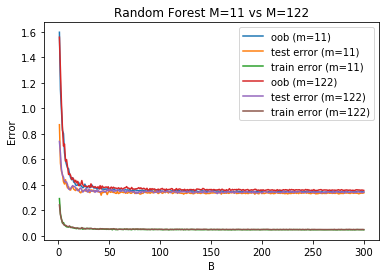

In [467]:
import matplotlib.pyplot as plt
plt.plot(bs, oob, label = "oob (m=11)")
plt.plot(bs, testerr, label = "test error (m=11)")
plt.plot(bs, trainerr, label = "train error (m=11)")
plt.plot(bs, oob2, label = "oob (m=122)")
plt.plot(bs, testerr2, label = "test error (m=122)")
plt.plot(bs, trainerr2, label = "train error (m=122)")
plt.xlabel('B')
plt.ylabel('Error')
plt.title('Random Forest M=11 vs M=122')
plt.legend()
plt.show()

**2(j)Build a variable importance plot (see p. 319 of ISLR) from your random forest. If the variable importance plot is hard to read, only keep the top 10 most important features.**

In [479]:
importances = r.feature_importances_
std = np.std([tree.feature_importances_ for tree in r.estimators_], axis=0)
varImportances = pd.DataFrame(data=zip(predictors,importances), columns=["Predictor","Importance"])
varImportances = varImportances.sort_values(by=['Importance'], ascending=False)

Predictor  Importance
50               PctIlleg    0.392452
44            PctKids2Par    0.142976
3            racePctWhite    0.032360
43             PctFam2Par    0.029196
68       PctPersDenseHous    0.013805
..                    ...         ...
99   LemasSwFTFieldPerPop    0.000437
100         LemasTotalReq    0.000425
98      LemasSwFTFieldOps    0.000336
70               MedNumBR    0.000172
96           LemasSwornFT    0.000171

[122 rows x 2 columns]

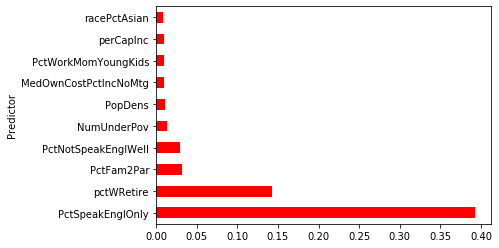

In [492]:
(pd.Series(importances, index=varImportances.Predictor).nlargest(10).plot(kind='barh', color='red'))

**2(k)(5 points extra credit) Use an iterative data imputation technique and repeat the above.**

**2(l)(20 points extra credit) Repeat 2i and 2j using Extra Trees. Use bootstrap sub-samples whose size is 20% of the dataset.**

In [27]:
from sklearn import ensemble

In [30]:
bs = np.linspace(1,300,300).astype(int)
oob_ET = []
testerr_ET = []
trainerr_ET = []
for b in bs:
    e = ensemble.ExtraTreesRegressor(n_estimators=b, max_features=11, max_samples=0.2, bootstrap=True, oob_score=True)
    e.fit(train_X, train_y)
    trainerr_ET.append(1-e.score(train_X, train_y))
    testerr_ET.append(1-e.score(test_X, test_y))
    oob_ET.append(1-e.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

In [31]:
#M = 122
bs = np.linspace(1,300,300).astype(int)
oob_ET2 = []
testerr_ET2 = []
trainerr_ET2 = []
for b in bs:
    e = ensemble.ExtraTreesRegressor(n_estimators=b, max_features=122, max_samples=0.2, bootstrap=True, oob_score=True)
    e.fit(train_X, train_y)
    trainerr_ET2.append(1-e.score(train_X, train_y))
    testerr_ET2.append(1-e.score(test_X, test_y))
    oob_ET2.append(1-e.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

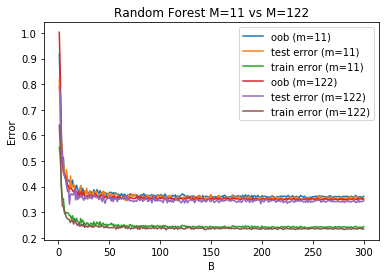

In [34]:
import matplotlib.pyplot as plt
plt.plot(bs, oob_ET, label = "oob (m=11)")
plt.plot(bs, testerr_ET, label = "test error (m=11)")
plt.plot(bs, trainerr_ET, label = "train error (m=11)")
plt.plot(bs, oob_ET2, label = "oob (m=122)")
plt.plot(bs, testerr_ET2, label = "test error (m=122)")
plt.plot(bs, trainerr_ET2, label = "train error (m=122)")
plt.xlabel('B')
plt.ylabel('Error')
plt.title('Random Forest M=11 vs M=122')
plt.legend()
plt.show()

In [35]:
importances = e.feature_importances_
std = np.std([tree.feature_importances_ for tree in e.estimators_], axis=0)
varImportances = pd.DataFrame(data=zip(predictors,importances), columns=["Predictor","Importance"])
varImportances = varImportances.sort_values(by=['Importance'], ascending=False)

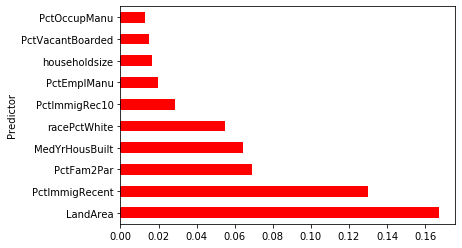

In [36]:
(pd.Series(importances, index=varImportances.Predictor).nlargest(10).plot(kind='barh', color='red'))